# Python libraries used


In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

# Brief look at the data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv")

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

The dataset has 8807 rows and 12 columns:

*   show_id: unique id of each show (not much of a use for us in this notebook)
*   type: The category of a show, can be either a Movie or a TV Show
*   title: Name of the show
*   director: Name of the director(s) of the show
*   cast: Name of actors and other cast of the show
*   country: Name of countries the show is available to watch on Netflix
*   date_added: Date when the show was added on Netflix
*   release_year: Release year of the show
*   rating: Show rating on netflix
*   duration: Time duration of the show
*   listed_in: Genre of the show
*   description: Some text describing the show








Release years

In [ ]:
data['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [ ]:
data['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

Type of show

In [ ]:
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

Age ratings

In [ ]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)


Countries

In [ ]:
data['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

Types of genres

In [ ]:
#list of unique genres - this gets the list but there are duplicates due to the space in front of some
genre_list  =  pd.unique(data.listed_in.str.split(",", expand =  True).stack())
for i  in range(len(genre_list)):
    genre_list[i] = genre_list[i].strip()

genre_list =  list(pd.unique(genre_list))
genre_list

['Documentaries',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Crime TV Shows',
 'TV Action & Adventure',
 'Docuseries',
 'Reality TV',
 'Romantic TV Shows',
 'TV Comedies',
 'TV Horror',
 'Children & Family Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'British TV Shows',
 'Comedies',
 'Spanish-Language TV Shows',
 'Thrillers',
 'Romantic Movies',
 'Music & Musicals',
 'Horror Movies',
 'Sci-Fi & Fantasy',
 'TV Thrillers',
 "Kids' TV",
 'Action & Adventure',
 'TV Sci-Fi & Fantasy',
 'Classic Movies',
 'Anime Features',
 'Sports Movies',
 'Anime Series',
 'Korean TV Shows',
 'Science & Nature TV',
 'Teen TV Shows',
 'Cult Movies',
 'TV Shows',
 'Faith & Spirituality',
 'LGBTQ Movies',
 'Stand-Up Comedy',
 'Movies',
 'Stand-Up Comedy & Talk Shows',
 'Classic & Cult TV']

# Missing data


Duplicated values

In [ ]:
data.duplicated().sum()

0

Null values

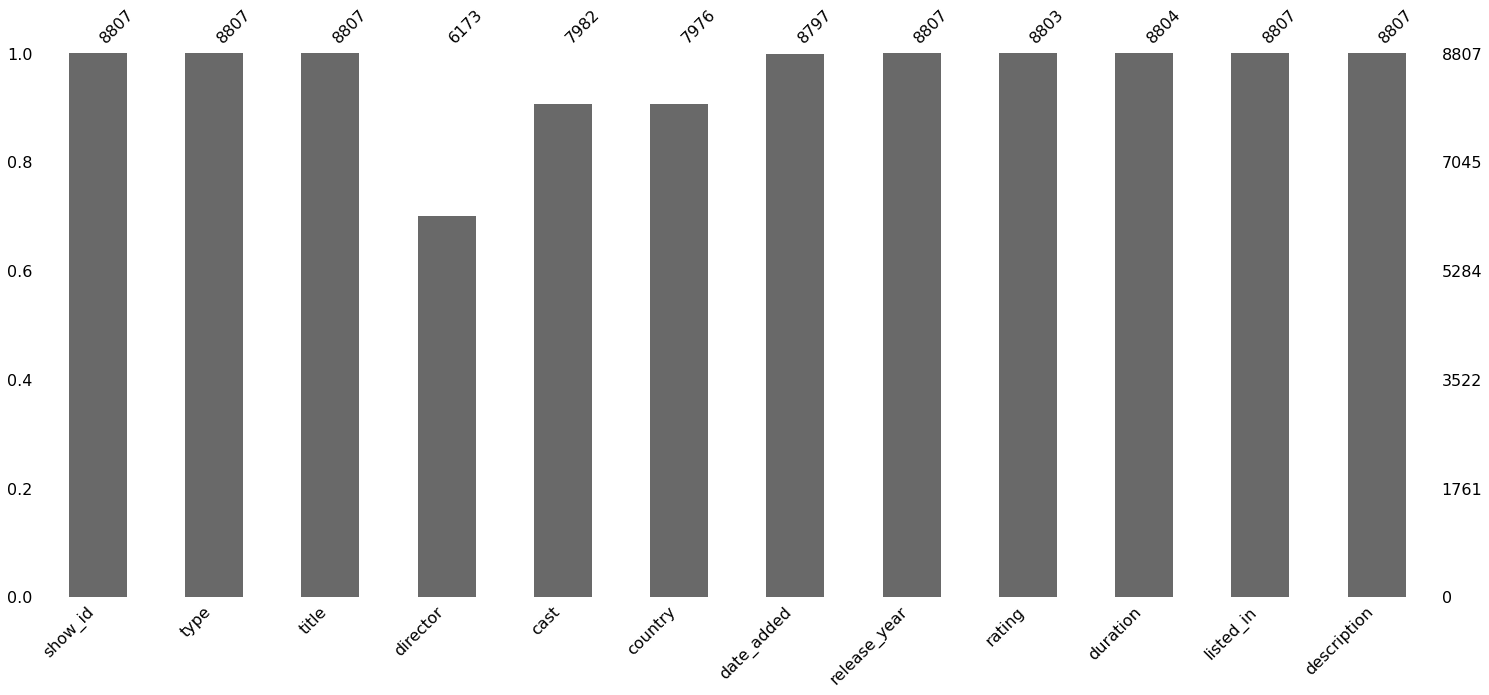

In [ ]:
msno.bar(data)

Unique values

In [ ]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Replacing nan values in director, cast, country, date_added, rating and duration columns

In [ ]:
nan_columns = ['director','cast','country','date_added', 'rating']

for column in nan_columns:
  data[column] = data[column].fillna("Unknown")

In [ ]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

Fixing errors in rating and missing values





In [ ]:
data["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
Unknown        4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

Types of ratings:

NB:Not Rated (NR) or Unrated (UR)

**Kids**
*   TV-Y Designed to be appropriate for all children
*   TV-Y7 Suitable for ages 7 and up
*   G Suitable for General Audiences
*   TV-G Suitable for General Audiences
*   PG Parental Guidance suggested
*   TV-PG Parental Guidance suggested

**Teens**

*   PG-13 Parents strongly cautioned. May be inappropriate for ages under 13.
*   TV-14 Parents strongly cautioned. May not be suitable for ages under 14.

**Adults**
*   R Restricted. May be inappropriate for ages under 17.
*   TV-MA For Mature Audiences
*   NC-17 Inappropriate for ages 17 and under

In [ ]:
# Need to merge NR and UR together 
# Need to find unknown values and replace them 
# Move the three weird ratings to duration 

1. Sort out unknown ratings

In [ ]:
data["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Unknown', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
(data.loc[data['rating'] == 'Unknown'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown,"Oprah Winfrey, Ava DuVernay",Unknown,"January 26, 2017",2017,Unknown,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Unknown,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,Unknown,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,Unknown,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,Unknown,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Unknown,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


Only 4 ratings unknown so we will replace them manually



*   5989 Rating = TV-PG
*   6827 Rating = TV-14
*   7312 Rating = TV-PG
*   7537 Rating = TV-MA


In [ ]:
unknown_rating = {
    5989 : "TV-PG",
    6827 : "TV-14",
    7312 : "TV-PG",
    7537 : "TV-MA"
} 

for id, rate in unknown_rating.items():
    data.iloc[id, 8] = rate

data['rating'].isna().sum()

0

In [ ]:
print(data.iloc[[5989,6827,7312,7537],])

     show_id     type                                              title  \
5989   s5990    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
6827   s6828  TV Show                  Gargantia on the Verdurous Planet   
7312   s7313  TV Show                                       Little Lunch   
7537   s7538    Movie                               My Honor Was Loyalty   

             director                                               cast  \
5989          Unknown                        Oprah Winfrey, Ava DuVernay   
6827          Unknown  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
7312          Unknown  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
7537  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

        country        date_added  release_year rating  duration  \
5989    Unknown  January 26, 2017          2017  TV-PG    37 min   
6827      Japan  December 1, 2016          2013  TV-14  1 Season   
7312  Australia  February 1, 2018 

In [ ]:
data["rating"].value_counts()

TV-MA       3208
TV-14       2161
TV-PG        865
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

2. Changing UR to NR as they are essentially the same


In [ ]:
data.loc[(data['rating'] == 'NR') | (data['rating'] =='UR')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5971,s5972,Movie,(T)ERROR,"Lyric R. Cabral, David Felix Sutcliffe",Unknown,United States,"June 30, 2016",2015,NR,84 min,Documentaries,This real-life look at FBI counterterrorism op...
5987,s5988,Movie,13 Cameras,Victor Zarcoff,"PJ McCabe, Brianne Moncrief, Sarah Baldwin, Ji...",United States,"August 13, 2016",2015,NR,90 min,"Horror Movies, Independent Movies, Thrillers",Young parents-to-be Claire and Ryan move into ...
6015,s6016,Movie,4th Man Out,Andrew Nackman,"Evan Todd, Parker Young, Chord Overstreet, Jon...",United States,"May 5, 2016",2015,NR,86 min,"Comedies, LGBTQ Movies",A young mechanic comes out to his extremely st...
6054,s6055,Movie,A Russell Peters Christmas,Henry Sarwer-Foner,"Russell Peters, Pamela Anderson, Michael Bublé...",Canada,"November 1, 2013",2011,NR,44 min,Stand-Up Comedy,"Inspired by the variety shows of the 1970s, ""A..."
6087,s6088,Movie,Act of Vengeance,Mahsun Kırmızıgül,"Haluk Bilginer, Mahsun Kırmızıgül, Mustafa San...","Turkey, United States","September 29, 2018",2010,NR,112 min,"Action & Adventure, International Movies",Two Turkish agents are sent to New York City o...
...,...,...,...,...,...,...,...,...,...,...,...,...
8682,s8683,Movie,Vizontele Tuuba,Yılmaz Erdoğan,"Yılmaz Erdoğan, Tarık Akan, Altan Erkekli, Cez...",Turkey,"March 10, 2017",2004,NR,106 min,"Comedies, Dramas, International Movies","With civil war looming, a TV-obsessed Turkish ..."
8727,s8728,Movie,When Hari Got Married,"Ritu Sarin, Tenzing Sonam",Unknown,"United Kingdom, India, United States","December 25, 2016",2013,NR,75 min,"Documentaries, International Movies",A small-town taxi driver is arranged to be mar...
8748,s8749,Movie,Winter of Our Dreams,John Duigan,"Judy Davis, Bryan Brown, Cathy Downes, Baz Luh...",Australia,"November 1, 2016",1981,NR,86 min,"Classic Movies, Dramas","After the death of a long-ago lover, married p..."
8790,s8791,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,"September 1, 2019",2008,UR,113 min,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...


In [ ]:
#UR to NR

data['rating'] = data['rating'].replace(['UR'], 'NR')


In [ ]:
data["rating"].value_counts()

TV-MA       3208
TV-14       2161
TV-PG        865
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            83
G             41
TV-Y7-FV       6
NC-17          3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

3. Move the last three to duration

In [ ]:
weird_rating = ['74 min', '84 min', '66 min']

In [ ]:
for i in range(len(data)):
    if data['rating'].iloc[i] in weird_rating:
        print(data.iloc[i])

show_id                                                     s5542
type                                                        Movie
title                                             Louis C.K. 2017
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                          April 4, 2017
release_year                                                 2017
rating                                                     74 min
duration                                                      NaN
listed_in                                                  Movies
description     Louis C.K. muses on religion, eternal love, gi...
Name: 5541, dtype: object
show_id                                                     s5795
type                                                        Movie
title                                       Louis 

*   5541 - rating TV-MA 74 min
*   5794 - rating TV-MA 84 min
*   5813 - rating TV-MA 66 min


In [ ]:
weird_rating_list = {
    5541 : '74 min',
    5794 : '84 min',
    5813 : '66 min'
}

for id, du in weird_rating_list.items():
    data.iloc[id, 9] = du
    data.iloc[id,8] = 'TV-MA'
    print(data.iloc[id])




show_id                                                     s5542
type                                                        Movie
title                                             Louis C.K. 2017
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                          April 4, 2017
release_year                                                 2017
rating                                                      TV-MA
duration                                                   74 min
listed_in                                                  Movies
description     Louis C.K. muses on religion, eternal love, gi...
Name: 5541, dtype: object
show_id                                                     s5795
type                                                        Movie
title                                       Louis 

In [ ]:
data["rating"].value_counts()

TV-MA       3211
TV-14       2161
TV-PG        865
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            83
G             41
TV-Y7-FV       6
NC-17          3
Name: rating, dtype: int64

In [ ]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Adding new columns 
1. genre 
2. year added 
3. month added

1. Genre list - replace listed in with Genre

In [ ]:
data['listed_in'].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [ ]:
#list of unique genres - this gets the list but there are duplicates due to the space in front of some
genre_list  =  pd.unique(data.listed_in.str.split(",", expand = True).stack())

In [ ]:
#this gets rid of the duplicates
for i  in range(len(genre_list)):
    genre_list[i] = genre_list[i].strip()

genre_list =  list(pd.unique(genre_list))
genre_list

['Documentaries',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Crime TV Shows',
 'TV Action & Adventure',
 'Docuseries',
 'Reality TV',
 'Romantic TV Shows',
 'TV Comedies',
 'TV Horror',
 'Children & Family Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'British TV Shows',
 'Comedies',
 'Spanish-Language TV Shows',
 'Thrillers',
 'Romantic Movies',
 'Music & Musicals',
 'Horror Movies',
 'Sci-Fi & Fantasy',
 'TV Thrillers',
 "Kids' TV",
 'Action & Adventure',
 'TV Sci-Fi & Fantasy',
 'Classic Movies',
 'Anime Features',
 'Sports Movies',
 'Anime Series',
 'Korean TV Shows',
 'Science & Nature TV',
 'Teen TV Shows',
 'Cult Movies',
 'TV Shows',
 'Faith & Spirituality',
 'LGBTQ Movies',
 'Stand-Up Comedy',
 'Movies',
 'Stand-Up Comedy & Talk Shows',
 'Classic & Cult TV']

In [ ]:
#rename listed_in with genre
data = data.rename(columns={'listed_in': 'genre'})

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


2. Split date_added into month added and year added

In [ ]:
data['date_added'].value_counts()['Unknown']

10

There are 10 unknown values in the data.

In [ ]:
data.loc[(data['date_added'] == 'Unknown')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,Unknown,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,Unknown,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,Unknown,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,Unknown,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,Unknown,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unknown,Unknown,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,Unknown,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,Unknown,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,Unknown,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,Unknown,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


It is difficult to find the missing dates and add them manually so we will drop these to avoid errors. 

In [ ]:
unknown_dateadded = data[data['date_added'] == 'Unknown' ].index

data.drop(unknown_dateadded, inplace = True)

data.count()

show_id         8797
type            8797
title           8797
director        8797
cast            8797
country         8797
date_added      8797
release_year    8797
rating          8797
duration        8797
genre           8797
description     8797
dtype: int64

In [ ]:
data["date_added"] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [ ]:
data["month_added"].value_counts()

7     827
12    813
9     770
4     764
10    760
8     755
3     742
1     738
6     728
11    705
5     632
2     563
Name: month_added, dtype: int64

In [ ]:
data["year_added"].value_counts()

2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

Getting a list of countries


In [ ]:
#list of unique countries - this gets the list but there are duplicates due to the space in front of some
country_list  =  pd.unique(data.country.str.split(",", expand = True).stack())

country_list

array(['United States', 'South Africa', 'Unknown', 'India', ' Ghana',
       ' Burkina Faso', ' United Kingdom', ' Germany', ' Ethiopia',
       'United Kingdom', 'Germany', ' Czech Republic', 'Mexico', 'Turkey',
       'Australia', ' India', ' France', 'Finland', 'China', ' Canada',
       ' United States', ' Japan', 'Nigeria', 'Japan', 'Spain', 'France',
       'Belgium', 'South Korea', ' Singapore', ' Australia', ' Mexico',
       ' Italy', ' Romania', 'Argentina', ' Venezuela', ' Hong Kong',
       'Russia', 'Canada', 'Hong Kong', ' China', 'Italy', '',
       ' South Korea', 'Ireland', ' Nepal', 'New Zealand', ' Brazil',
       ' Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel', 'Brazil',
       ' Spain', 'Taiwan', ' Nigeria', 'Bulgaria', ' Algeria', 'Poland',
       ' Israel', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt',
       ' Denmark', ' Switzerland', 'Kuwait', ' Netherlands', ' Belgium',
       'Malaysia', ' New Zealand', 'Vietnam', ' Hungary', 'Sweden',
       'L

In [ ]:
#this gets rid of the duplicates
for i  in range(len(country_list)):
    country_list[i] = country_list[i].strip()

country_list =  list(pd.unique(country_list))
country_list

['United States',
 'South Africa',
 'Unknown',
 'India',
 'Ghana',
 'Burkina Faso',
 'United Kingdom',
 'Germany',
 'Ethiopia',
 'Czech Republic',
 'Mexico',
 'Turkey',
 'Australia',
 'France',
 'Finland',
 'China',
 'Canada',
 'Japan',
 'Nigeria',
 'Spain',
 'Belgium',
 'South Korea',
 'Singapore',
 'Italy',
 'Romania',
 'Argentina',
 'Venezuela',
 'Hong Kong',
 'Russia',
 '',
 'Ireland',
 'Nepal',
 'New Zealand',
 'Brazil',
 'Greece',
 'Jordan',
 'Colombia',
 'Switzerland',
 'Israel',
 'Taiwan',
 'Bulgaria',
 'Algeria',
 'Poland',
 'Saudi Arabia',
 'Thailand',
 'Indonesia',
 'Egypt',
 'Denmark',
 'Kuwait',
 'Netherlands',
 'Malaysia',
 'Vietnam',
 'Hungary',
 'Sweden',
 'Lebanon',
 'Syria',
 'Philippines',
 'Iceland',
 'United Arab Emirates',
 'Norway',
 'Qatar',
 'Mauritius',
 'Austria',
 'Cameroon',
 'Palestine',
 'Uruguay',
 'Kenya',
 'Chile',
 'Luxembourg',
 'Cambodia',
 'Bangladesh',
 'Portugal',
 'Cayman Islands',
 'Senegal',
 'Serbia',
 'Malta',
 'Namibia',
 'Angola',
 'Peru',

# Data Visualisation

1. Type of content
2. Number of content added each year
3. Most popular month to add content
4. Number of content released each year
5. Content by Country
6. Content by Ratings
7. Content by Genre
8. Content by Duration


In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [ ]:
data['type'].value_counts()

Movie      6131
TV Show    2666
Name: type, dtype: int64

In [ ]:
#create new data sets for TV shows and Movie

data_movie = data[data['type']== 'Movie']
data_movie.head()

data_tvshow = data[data['type']== 'TV Show']
data_tvshow.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_added,month_added
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9


1. Type of content


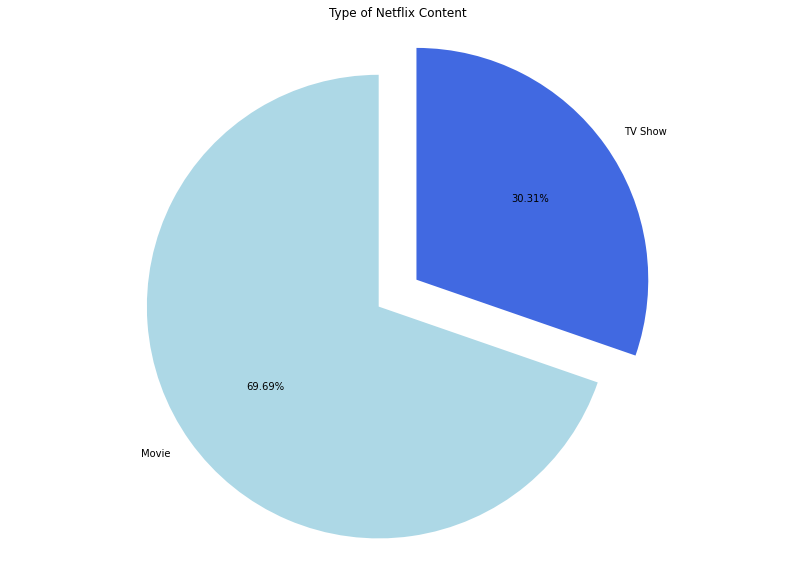

In [ ]:
plt.figure(figsize=(14, 10))

labels = ['Movie','TV Show']
plt.pie(data['type'].value_counts(),labels=labels,explode=[0.1,0.1],autopct='%1.2f%%',colors=['lightblue','royalblue'], startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

2. Number of content added each year

In [ ]:
#how much content was added each year

data['year_added'].value_counts()

2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

Text(0.5, 1.0, 'Amount of content added each year')

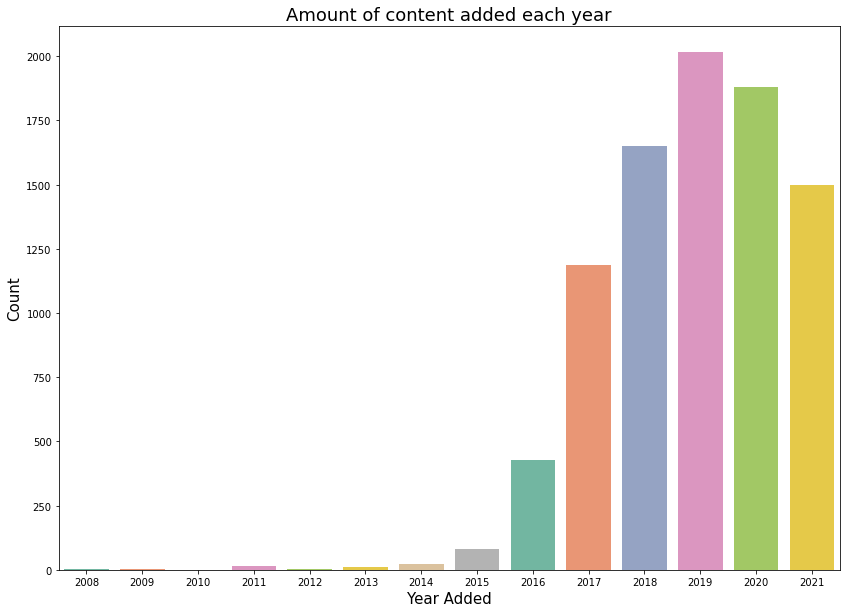

In [ ]:
plt.figure(figsize=(14, 10))

sns.countplot(data=data, x= 'year_added', palette = "Set2")

plt.xlabel('Year Added', fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Amount of content added each year", fontsize = 18)

In [ ]:
data_yearadded = data['year_added'].value_counts().reset_index().rename(columns={"index": "year", "year_added": "count"}).sort_values('year')

data_yearadded

,year,count
12,2008,2
11,2009,2
13,2010,1
8,2011,13
10,2012,3
9,2013,11
7,2014,24
6,2015,82
5,2016,429
4,2017,1188


In [ ]:
data_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9


In [ ]:
data_movie['year_added'].value_counts()

2019    1424
2020    1284
2018    1237
2021     993
2017     839
2016     253
2015      56
2014      19
2011      13
2013       6
2012       3
2009       2
2008       1
2010       1
Name: year_added, dtype: int64

In [ ]:
movie_year = data_movie['year_added'].value_counts().reset_index().sort_values('index')

movie_year = movie_year.rename(columns={"index": "year", "year_added": "count"})
movie_year

,year,count
12,2008,1
11,2009,2
13,2010,1
8,2011,13
10,2012,3
9,2013,6
7,2014,19
6,2015,56
5,2016,253
4,2017,839


In [ ]:
data_tvshow.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_added,month_added
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9


In [ ]:
data_tvshow["year_added"].value_counts()

tvshow_year = data_tvshow['year_added'].value_counts().reset_index().rename(columns={"index": "year", "year_added": "count"}).sort_values('year')
tvshow_year

,year,count
9,2008,1
8,2013,5
7,2014,5
6,2015,26
5,2016,176
4,2017,349
3,2018,412
1,2019,592
0,2020,595
2,2021,505


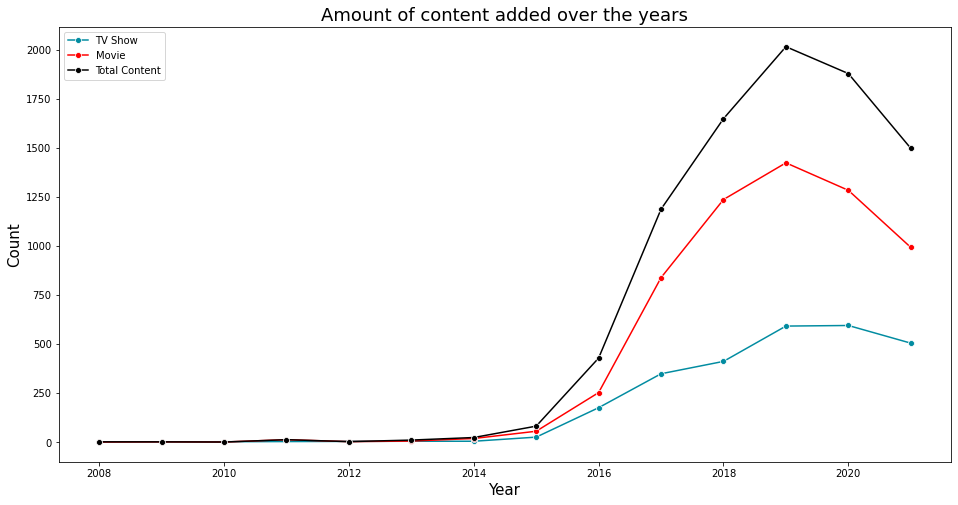

In [ ]:
plt.figure(figsize = (16, 8))
sns.lineplot(x=tvshow_year['year'],y=tvshow_year['count'],marker = "o", color='#028ca1', label='TV Show')
sns.lineplot(x=movie_year['year'],y=movie_year['count'],marker = "o", color='red', label='Movie')
sns.lineplot(x = data_yearadded['year'], y=data_yearadded['count'],marker = "o", color='black', label= "Total Content")



plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title("Amount of content added over the years", fontsize = 18)
plt.show()

3. Most popular month to add content

In [ ]:
#Most popular month to add content

data['month_added'].value_counts()

7     827
12    813
9     770
4     764
10    760
8     755
3     742
1     738
6     728
11    705
5     632
2     563
Name: month_added, dtype: int64

Text(0.5, 1.0, 'Most popular month to add content')

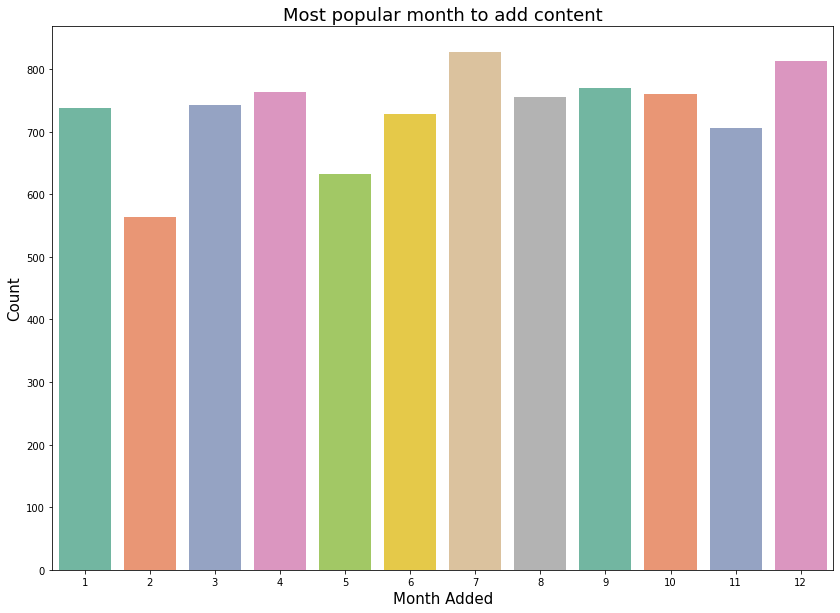

In [ ]:
plt.figure(figsize=(14, 10))

sns.countplot(data=data, x= 'month_added', palette = "Set2")

plt.xlabel('Month Added', fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Most popular month to add content", fontsize = 18)
plt.show()

4. Amount of content released each year

Text(0.5, 1.0, 'Amount of content released each year ')

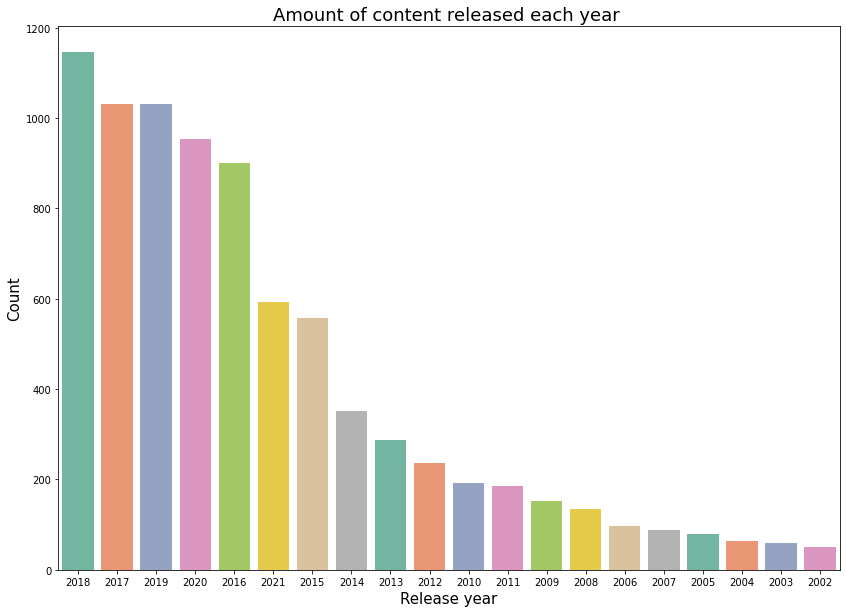

In [ ]:
#Amount of content released each year 
plt.figure(figsize=(14, 10))
sns.countplot(data=data, x= 'release_year', palette = "Set2", order=data['release_year'].value_counts().index[0:20])

plt.xlabel('Release year', fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Amount of content released each year ", fontsize = 18)
plt.show()

In [ ]:
#oldest shows on netflix (top 15)
old_shows = data.sort_values('release_year' , ascending =  True)

old_shows[['title' ,'release_year']].head(15)

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8660,Undercover: How to Operate Behind Enemy Lines,1943
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
8436,The Negro Soldier,1944
8640,Tunisian Victory,1944
7219,Know Your Enemy - Japan,1945


5. Content by country

In [ ]:
#create function for columns with multiple elements in them
#will be used in country and genre 

def getlist(x):
    data_list =  list()
    for v in x:
        values = v.split(", ")
        for i  in values:
            data_list.append(i)
    return list(data_list)

In [ ]:
#What countries have the most amount of content?
country_list = getlist(data['country'])

pd.value_counts(country_list)

United States     3683
India             1046
Unknown            830
United Kingdom     803
Canada             445
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Length: 128, dtype: int64

There are over 100 countries - will look at the top 20

Unknown is in the top 20 so we should remove it


In [ ]:
country_count = pd.value_counts(country_list).to_frame(name = "count").reset_index()

country_count = country_count.drop(2)
country_count = country_count.rename(columns={"index": "country"})

top20country = country_count.head(20)

Text(0.5, 1.0, 'Top 20 countries with most contents')

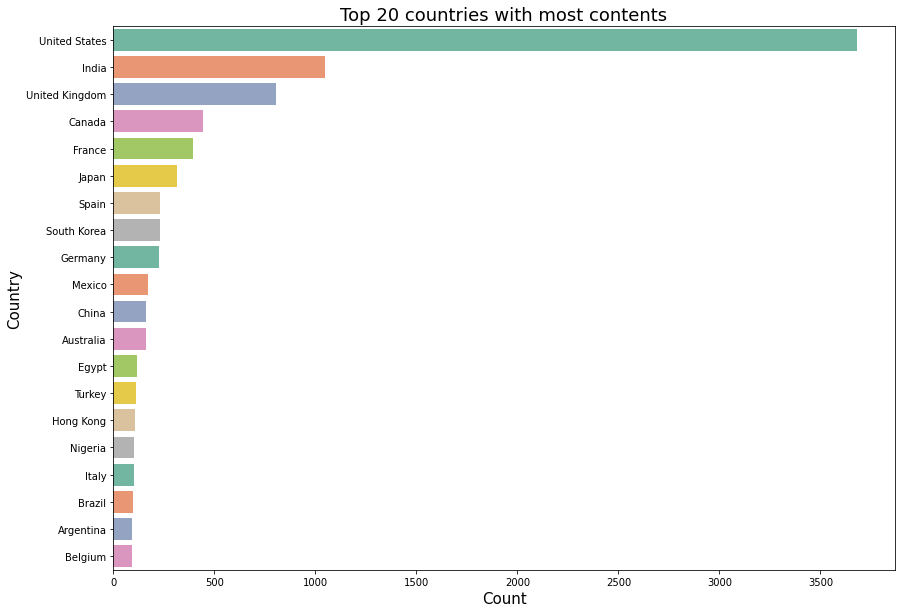

In [ ]:
plt.figure(figsize=(14, 10))
sns.barplot(data=top20country, x = 'count', y= 'country', palette = "Set2")

plt.xlabel('Count', fontsize = 15)
plt.ylabel("Country", fontsize = 15)
plt.title("Top 20 countries with most contents", fontsize = 18)
plt.show()

6. Content by ratings


In [ ]:
data['rating'].value_counts()

TV-MA       3209
TV-14       2158
TV-PG        863
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            82
G             41
TV-Y7-FV       6
NC-17          3
Name: rating, dtype: int64

Text(0.5, 1.0, 'Content Ratings')

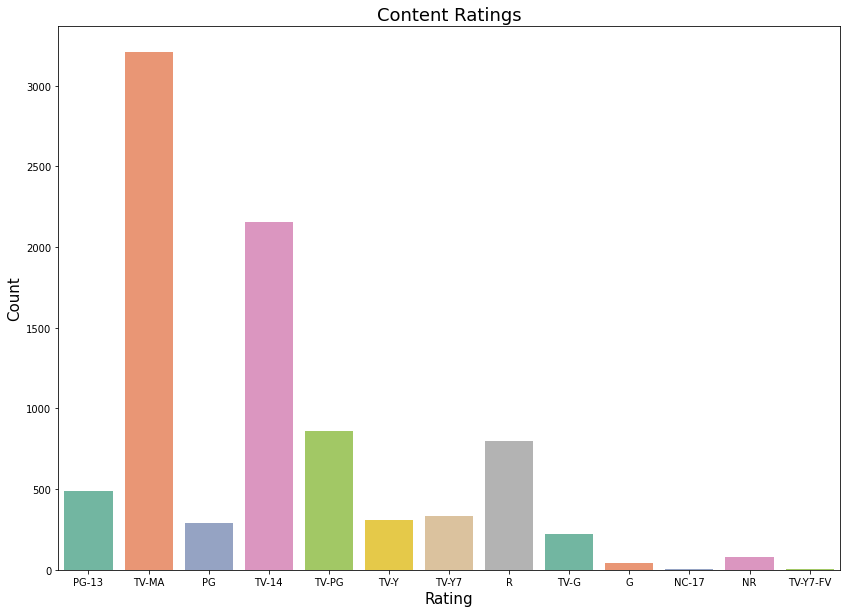

In [ ]:
plt.figure(figsize=(14, 10))
sns.countplot(data=data, x = 'rating',  palette = "Set2")

plt.xlabel('Rating', fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Content Ratings", fontsize = 18)
plt.show()

In [ ]:
#TV ratings
data_tvshow['rating'].value_counts()

TV-MA       1143
TV-14        731
TV-PG        322
TV-Y7        194
TV-Y         175
TV-G          94
NR             4
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

Text(0.5, 1.0, 'Content Ratings for TV Shows')

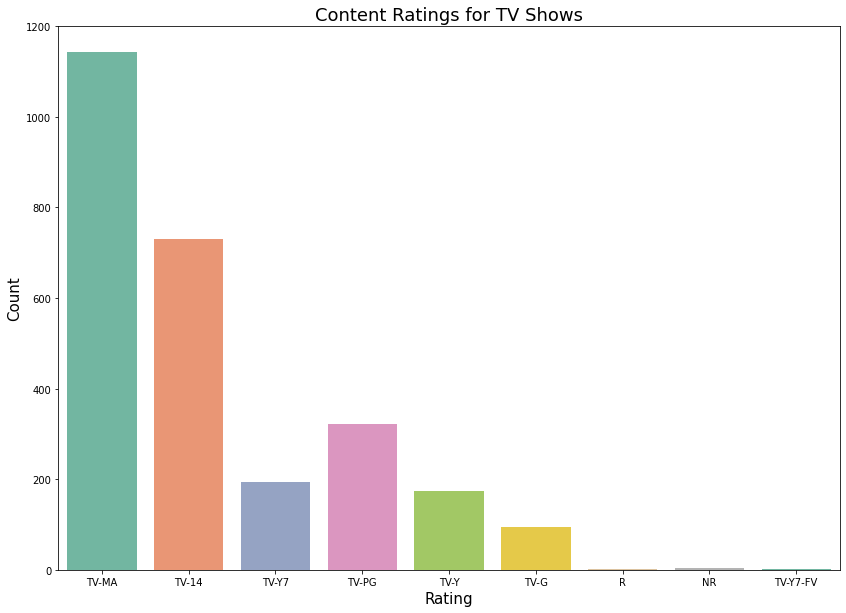

In [ ]:
plt.figure(figsize=(14, 10))
sns.countplot(data=data_tvshow, x = 'rating',  palette = "Set2")

plt.xlabel('Rating', fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Content Ratings for TV Shows", fontsize = 18)
plt.show()

In [ ]:
#Movie ratings
data_movie['rating'].value_counts()

TV-MA       2066
TV-14       1427
R            797
TV-PG        541
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            78
G             41
TV-Y7-FV       5
NC-17          3
Name: rating, dtype: int64

Text(0.5, 1.0, 'Content Ratings for Movies')

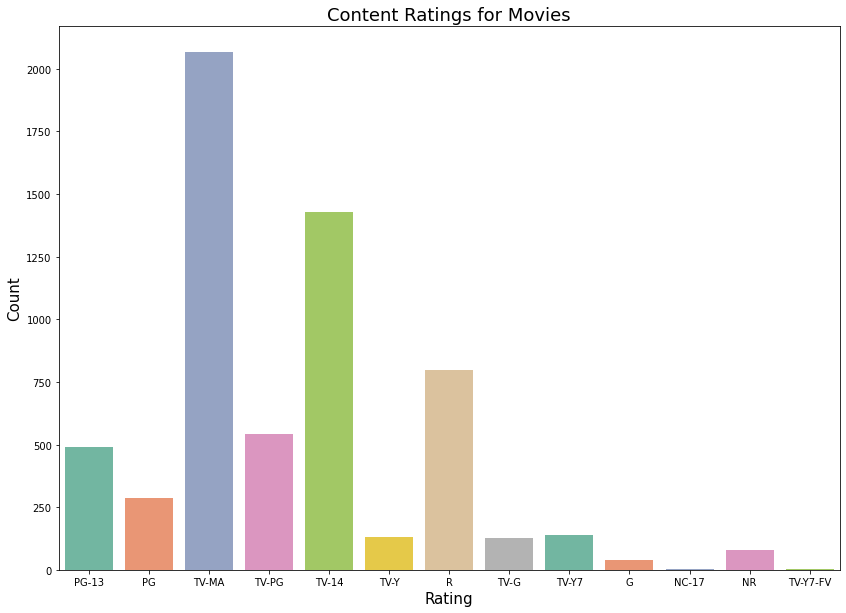

In [ ]:
plt.figure(figsize=(14, 10))
sns.countplot(data=data_movie, x = 'rating',  palette = "Set2")

plt.xlabel('Rating', fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Content Ratings for Movies", fontsize = 18)
plt.show()

7. Content by genre

In [ ]:
genre_count = getlist(data['genre'])
pd.value_counts(genre_count)

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1350
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      574
Crime TV Shows                   469
Kids' TV                         449
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     175
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows                  151
C

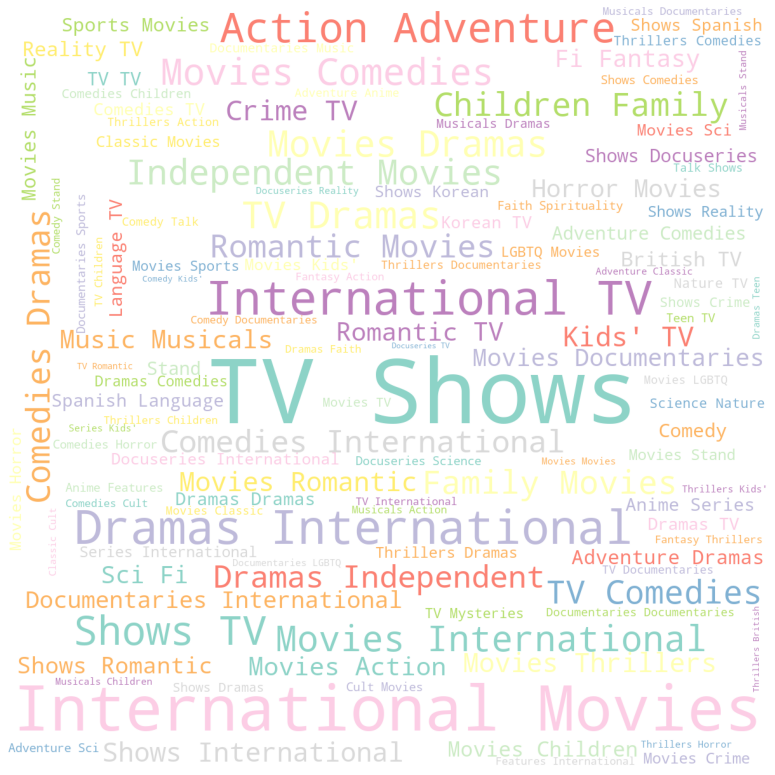

In [ ]:
text = ' '.join(data['genre'])

plt.rcParams['figure.figsize'] = (14,14)

wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 120, colormap='Set3').generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#Word cloud for Movies
moviegenrecount = getlist(data_movie['genre'])

pd.value_counts(moviegenrecount)

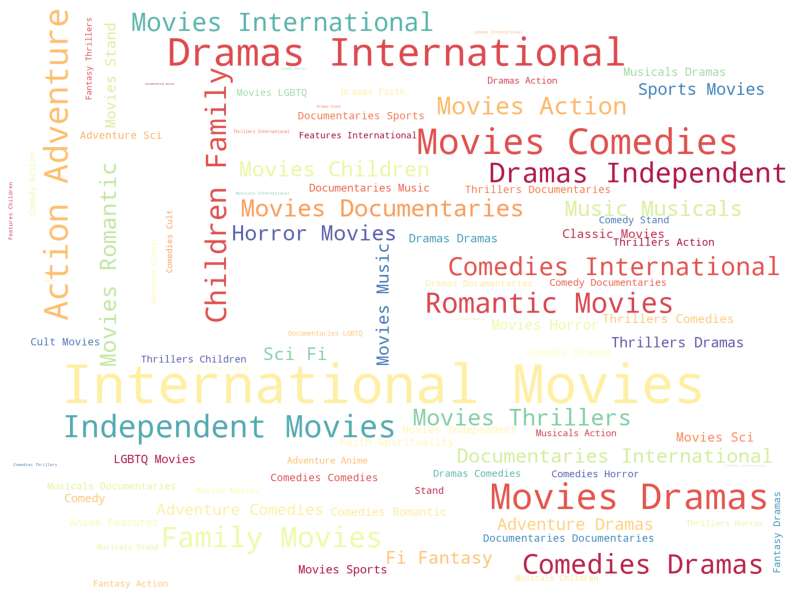

In [ ]:
text = ' '.join(data_movie['genre'])

plt.rcParams['figure.figsize'] = (14,14)

moviewordcloud = WordCloud(background_color = 'white', width = 1600,  height = 1200, max_words = 120, colormap='Spectral').generate(text)

plt.imshow(moviewordcloud)
plt.axis('off')
plt.show()

In [ ]:
#Word cloud for TV Shows
tvgenrecount = getlist(data_tvshow['genre'])

pd.value_counts(tvgenrecount)

International TV Shows          1350
TV Dramas                        762
TV Comedies                      574
Crime TV Shows                   469
Kids' TV                         449
Docuseries                       394
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 252
Anime Series                     175
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               83
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 26
TV Shows                          16
dtype: int64

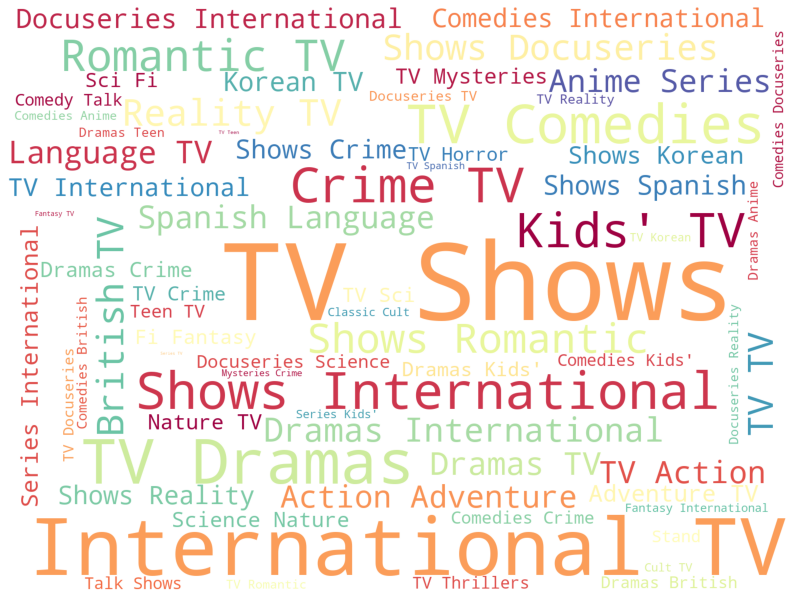

In [ ]:
text = ' '.join(data_tvshow['genre'])

plt.rcParams['figure.figsize'] = (14,14)

tvwordcloud = WordCloud(background_color = 'white', width = 1600,  height = 1200, max_words = 120, colormap='Spectral').generate(text)

plt.imshow(tvwordcloud)
plt.axis('off')
plt.show()

8. Content by Duration


In [ ]:
#TV show seasons

data_tvshow['duration'].value_counts()

1 Season      1793
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: duration, dtype: int64

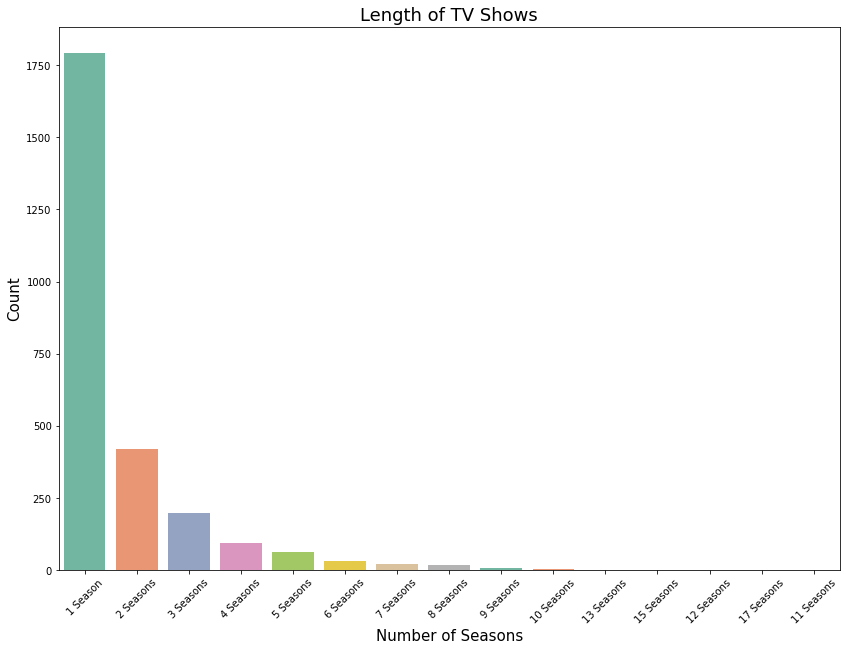

In [ ]:
plt.figure(figsize=(14, 10))
sns.countplot(data=data_tvshow, x = 'duration',  palette = "Set2", order = data_tvshow['duration'].value_counts().index)

plt.xlabel('Number of Seasons', fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Length of TV Shows", fontsize = 18)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Length of movies

data_movie['duration'].value_counts()

90 min     152
94 min     146
97 min     146
93 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

there are over 205 different variables so we will find the distribution instead

In [ ]:
movielength = data_movie['duration'].str.rstrip(' min')

movielength.value_counts()


90     152
94     146
97     146
93     146
91     144
      ... 
208      1
5        1
16       1
186      1
191      1
Name: duration, Length: 205, dtype: int64

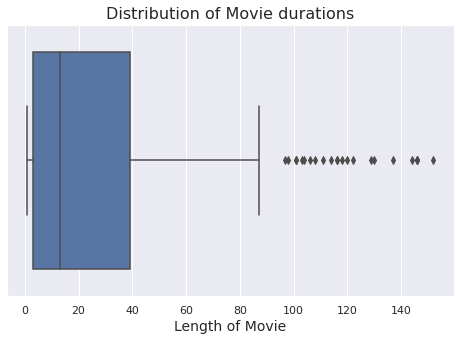

In [ ]:
sns.set(rc={"figure.figsize":(8, 5)})

movieboxplot = sns.boxplot(x=movielength.value_counts())
movieboxplot.axes.set_title("Distribution of Movie durations", fontsize=16)
movieboxplot.set_xlabel("Length of Movie", fontsize=14)
plt.show()